## Analyzing ECG 

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
DATASET_URL = "datasets/arhythmia/"
with open(DATASET_URL+"arrhythmia.data") as f:
    lines = f.readlines()
# filter values and load
X_ = []
y_ = []
for line in lines:
    line = line.strip()
    val = line.split(',')
    val  = [float(v) if v != '?' else np.nan for v in val ] # replace missing values with nan
    x_vals = val[:-1]
    y_val = val[-1]
    X_.append(x_vals)
    y_.append(y_val)

df_X = pd.DataFrame(np.array(X_))
df_y = pd.DataFrame(np.array(y_))


In [5]:
input_size = 279 # refer dataset description
output_size = 13 # refer dataset description


In [6]:
# replace np.nans
df_X = df_X.replace(to_replace='?',value=np.nan )
df_ = df_X.fillna(df_X.mean())

In [7]:
df_.isnull().values.any()

False

In [8]:
df_y.isnull().values.any()

False

In [11]:
labels = np.unique(df_y)

In [12]:
"""
    Generate Labels for classes
"""
label_to_ix = {}
ix_to_label = {}
for i in range(len(labels)):
    label_to_ix[labels[i]] = i
    ix_to_label[i] = labels[i]

# convert  output to labels 
y_vals = []
for val in y_:
    y_vals.append(label_to_ix[val])

y_vals = np.array(y_vals)
X_train, X_test, y_train, y_test = train_test_split(np.array(df_), y_vals)
# verifying dimensions u need not  :P
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(339, 279)
(339,)
(113, 279)
(113,)


----------
Epoch: 0
Loss:  5.1657209396362305
Test Set  Accuracy :  0.017699115044247787
----------
Epoch: 10
Loss:  1.716880202293396
Test Set  Accuracy :  0.45132743362831856
----------
Epoch: 20
Loss:  1.2390081882476807
Test Set  Accuracy :  0.5398230088495575
----------
Epoch: 30
Loss:  1.032656192779541
Test Set  Accuracy :  0.5575221238938053
----------
Epoch: 40
Loss:  0.877038300037384
Test Set  Accuracy :  0.584070796460177
----------
Epoch: 50
Loss:  0.7552915811538696
Test Set  Accuracy :  0.5752212389380531
----------
Epoch: 60
Loss:  0.6431186199188232
Test Set  Accuracy :  0.584070796460177
----------
Epoch: 70
Loss:  0.5538753867149353
Test Set  Accuracy :  0.5752212389380531
----------
Epoch: 80
Loss:  0.47922757267951965
Test Set  Accuracy :  0.584070796460177
----------
Epoch: 90
Loss:  0.4144020080566406
Test Set  Accuracy :  0.5929203539823009
Min acc: 0.017699115044247787 Epoch: 0
Max acc: 0.6194690265486725 Epoch: 97


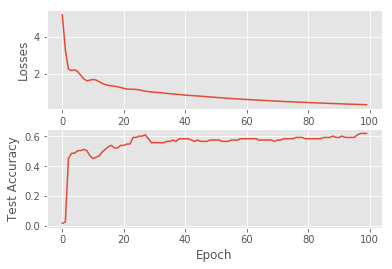

Accuracy over test set: 0.6194690265486725


In [18]:
"""
    Time to play with torch
"""
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class NN(nn.Module):
    def __init__(self, input_size, output_size):
        super(NN, self).__init__()
        self.linear0 = nn.Linear(input_size, 200)
        self.linear1 = nn.Linear(200, 100)
        self.linear2 = nn.Linear(100,output_size)
    
    def forward(self, input):
        output = F.relu(self.linear0(input))
        output = F.relu(self.linear1(output))
        output = F.relu(self.linear2(output))
        return output

def train(model, epochs=100):
    acc = []
    model.train(True)
    for epoch in range(epochs):
        optimizer.zero_grad()
        inputs = Variable(torch.from_numpy(X_train.astype(np.float32)))
        targets = Variable(torch.from_numpy(y_train))
        output = model(inputs)
        loss = criterion(output, targets)
        losses.append(loss.data[0])
        test_acc = evaluate(model)
        acc.append(test_acc)
        if epoch % 10 == 0:
            print('-'*10)
            print('Epoch:',epoch)
            print('Loss: ',loss.data[0])
#             print()
            print('Test Set  Accuracy : ',test_acc)
        
        loss.backward()
        optimizer.step()
    print('Min acc:',min(acc), 'Epoch:',acc.index(min(acc)))
    print('Max acc:', max(acc), 'Epoch:', acc.index(max(acc)))
    plt.figure(1)
    plt.subplot(211)
    plt.ylabel('Losses')
    plt.xlabel('epoch')
    plt.plot(losses)
    plt.subplot(212)
    plt.ylabel('Test Accuracy')
    plt.xlabel('Epoch')
    plt.plot(acc)
    plt.show()
    return acc

def evaluate(model):
    model.train(False)
    output = model(Variable(torch.from_numpy(X_test.astype(np.float32))))
    correct = 0
    for i in range(len(y_test)):
        if torch.max(output,1)[1].data.numpy()[i] == y_test[i]:
            correct+=1
    return correct/len(y_test)


model = NN(input_size, output_size)
learning_rate = 0.0003
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
losses = []

acc = train(model)
print('Accuracy over test set:', evaluate(model))